# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.28 which is incompatible.
jupyter-console 6.4.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 5.2.4 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [ ]:
from unityagents import UnityEnvironment
from dqn_agent import Agent
from collections import deque

import numpy as np
import random
import os
import torch
import time
from math import tanh
import matplotlib.pyplot as plt

In [3]:
# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Define the State and Action Spaces

Run the code cell below to get some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Train the Agent with DQN

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [6]:
agent = Agent(state_size, action_size, seed=int(time.time()))

# Helper functions
def get_time_string():
    return time.strftime('%Y%m%d%H%M%S')

def get_epsilon_i(num_episodes, epsilon_min = 0.01, evaluate = True): # evaluate=True by default coz tanh doesn't work well with Sarsa
        """ Getting a nice numpy array with epsilon values for every episode according to
        epsilon_i = epsilon_min+(1.0-epsilon_min)*(1-tanh(10*(i/num_episodes))) """
        if evaluate:
            epsilon = [1.0 / (i+1) for i in range(num_episodes+10)]
        else:
            epsilon = [epsilon_min+(1.0-epsilon_min)*(1-tanh(10*(i/num_episodes))) for i in range(num_episodes+10)]
        return epsilon

In [7]:
scores = []  # List with all scores per episode
scores_100_mean = 0 # Mean score over the last 100 episodes

NUM_EPISODES = 1800
CRIT_SOLVED = 13 #How many Bananas must be collected to succeed?

epsilon = get_epsilon_i(NUM_EPISODES, evaluate = False)

for epc in range(NUM_EPISODES):

    env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0     # initialize the score
    

    start_time = time.time()

    while True:
        action = agent.act(state, epsilon[epc])        # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        agent.step(state, action, reward, next_state, done)
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break

    scores.append(score)
    if len(scores) >= 100:
        scores_100_mean = np.mean( scores[-100:] )
        
    
    stop_time = time.time()

    print( '\rEpoch:{:>5}; Score: {:>5}; Epsilon: {:2.4f}; Mean (100): {:+3.2f}'.format( epc+1, score, epsilon[epc], scores_100_mean ), \
          end = ' ')
    if ( epc+1 ) % 100 == 0:       
        print('*')
        
    if (scores_100_mean > CRIT_SOLVED):
        print('#')
        print( 'Criterion reached (Mean of recent 100 runs > '+ str(CRIT_SOLVED) +'), enviroment is considered as solved!')
        break

Epoch:  100; Score:   3.0; Epsilon: 0.5045; Mean (100): +0.61 *
Epoch:  200; Score:   5.0; Epsilon: 0.2055; Mean (100): +4.79 *
Epoch:  300; Score:  11.0; Epsilon: 0.0789; Mean (100): +8.57 *
Epoch:  400; Score:  16.0; Epsilon: 0.0332; Mean (100): +12.22 *
Epoch:  459; Score:  20.0; Epsilon: 0.0221; Mean (100): +13.01 #
Criterion reached (Mean of recent 100 runs > 13), enviroment is considered as solved!


In [17]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

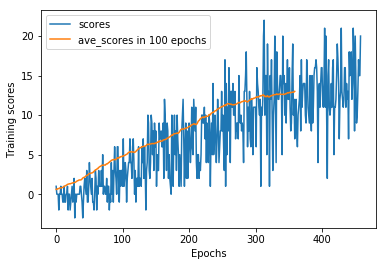

In [21]:
plt.plot(scores, label="scores")
plt.plot(moving_average(scores,100), label="ave_scores in 100 epochs")
plt.ylabel('Training scores')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [13]:
timestamp = get_time_string()
torch.save(agent.qnetwork_local.state_dict(), 'navigation.pth')
print('Timestamp is: ' + timestamp)

Timestamp is: 20220404102014


When finish, you can close your environment here

In [10]:
env.close()

### 4. Testing the trained agent in action!
if the obove env.close() executed, you need to start the env in steps 1 & 2

In [14]:
agent = Agent(state_size, action_size, seed = int(time.time()))

In [15]:
FILENAME = 'navigation.pth' #saved model

if torch.cuda.is_available():
    map_location=lambda storage, loc: storage.cuda()
    print('CUDA')
else:
    map_location='cpu'
    print('CPU')
    

# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load(FILENAME, map_location=map_location))
agent.qnetwork_local.eval() #Set Network in evaluation mode - important!

CPU


QNetwork(
  (fc1): Linear(in_features=37, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)

In [26]:
agent

In [22]:
score_lst = []

for epc in range(10):

    env_info = env.reset(train_mode=False)[brain_name] # Reset & train_mode => False -> fast & True -> slow
    state = env_info.vector_observations[0]            # get the current state
    score = 0     # initialize the score

    start_time = time.time()

    while True:
        action = agent.act( state, eps = 0.01 )        # select an action & keep a bit randomness (eps)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break

    stop_time = time.time()
    score_lst.append(score)
    print( '\rEpoch:{:>5}; Score: {:>5}; Execution time: {:.4f}'.format( epc+1, score, stop_time - start_time ), end = ' ' )
    
    if (epc+1) % 100 == 0:
        print('; {:2.2f} (mea); {:2.2f} (std)'.format(np.mean( score_lst[-100:] ), np.std( score_lst[-100:] )))

print( 'Achieved mean and standard deviation over {} test runs: {:2.2f} (mea) {:2.2f} (std) '\
      .format( ( epc+1 ), np.mean(score_lst), np.std(score_lst) ) )

Epoch:   10; Score:  13.0; Execution time: 29.8206 Achieved mean and standard deviation over 10 test runs: 15.10 (mea) 2.51 (std) 


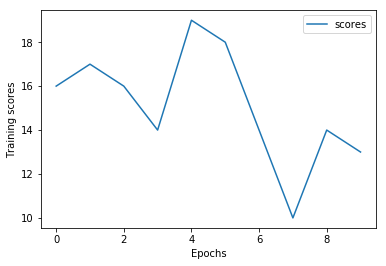

In [23]:
plt.plot(score_lst, label="scores")
plt.ylabel('Training scores')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
env.close()